# CSCA-5642: Diaster Tweets Classification Analysis Project #
#### Develop an algorithm to predict which Tweets are about real disasters and which ones are not. ####
    
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5642-week4/tree/main](https://github.com/alme9155/csca-5642-week4/tree/main)  


## I. Brief description of the problem and data ##

This project aims to tackle the Natural diaster tweet prediction to run a binary text classification whether a tweet refers to a real disaster event or not.
### Dataset: ####
* The competition dataset contains 3 CSV files: "train.csv", "test.csv" and "sample_submission.csv".
* File "train.csv" contains development data with target label (target=1) or not (target=0).
* File "test.csv" contains test data to be classified for the competition.
* File "sample_submission.csv" contains sample submission format after text classification prediction.

### Data Size and Dimension ####
* Training dataset: ~7000 tweet text with unique 'ID' columns and 'target' (0 - disaster, 1 - not diaster)
* Test dataset: ~3200 tweet text with same column structure as 'train.csv' without 'target' column.
* Both Training and Test dataset contains a 'keyword' column, such as "file", "earthquake"
* Both Training and Test dataset contains a 'location' with optional text value.

### Competition Rules ###
* Expected submission CSV files in the same format as "sample_submission.csv" with two columns "id, target". (id: unique id from test set, target: 0, or 1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print('File Listing from Kaggle Competition.')

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
File Listing from Kaggle Competition.


## II. Exploratory Data Analysis (EDA) ##
### II.i Data Exploration ###
- Inspect CSV file dimension (num of rows x num of columns)
- Inspect distribution of 'keyword', 'location' and 'target' columns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

print('Common library loaded.')

Common library loaded.


In [3]:
import pandas as pd
import os 

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sample_submission_df = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
print('Data File loaded.')

Data File loaded.


In [4]:
# Explore Development DataSet
print(f"\n{'=' * 10}Development DataSet (train.csv): {'=' * 10}\n")
display(train_df.head(10))
max_text_length_dev = train_df['text'].str.len().max()
print(f"Dimension of the development set: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"Max length of Tweet text in Dev. DataSet: {max_text_length_dev}")

# Explore Test DataSet:
print(f"\n{'=' * 10}Test DataSet (test.csv): {'=' * 10}\n")
display(test_df.head(10))
max_text_length_test = test_df['text'].str.len().max()
print(f"Dimension of the development set: {test_df.shape[0]} rows, {test_df.shape[1]} columns")
print(f"Max length of Tweet text in Test DataSet: {max_text_length_test}")


# Explore Sapmle Submission file format:
print(f"\n{'=' * 10}Test DataSet (sample_submission.csv): {'=' * 10}\n")
display(sample_submission_df.head(5))
print(f"Dimension of the development set: {sample_submission_df.shape[0]} rows, {sample_submission_df.shape[1]} columns")



==========Development DataSet (train.csv): ==========



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


Dimension of the development set: 7613 rows, 5 columns
Max length of Tweet text in Dev. DataSet: 157

==========Test DataSet (test.csv): ==========



,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


Dimension of the development set: 3263 rows, 4 columns
Max length of Tweet text in Test DataSet: 151

==========Test DataSet (sample_submission.csv): ==========



,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


Dimension of the development set: 3263 rows, 2 columns


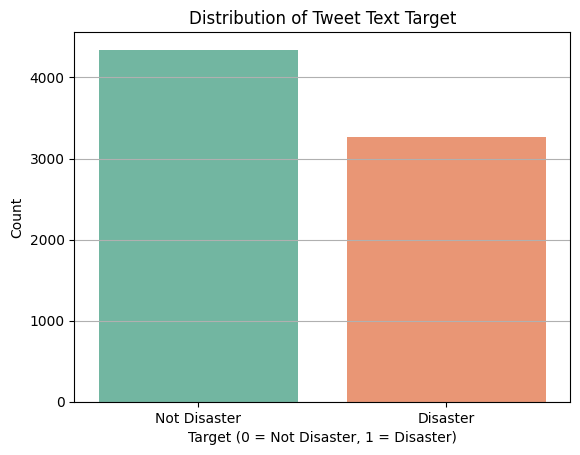

Rows missing 'target' value: 0 row(s)
--------------------
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


In [5]:
### Explore target column distribution of Tweet text.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=train_df, x='target', palette='Set2')
plt.title("Distribution of Tweet Text Target")
plt.xlabel("Target (0 = Not Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.grid(axis='y')
plt.show()

missing_target_count = train_df['target'].isnull().sum()
print(f"Rows missing 'target' value: {missing_target_count} row(s)")
print('--------------------')
print(train_df['target'].value_counts(normalize=True))



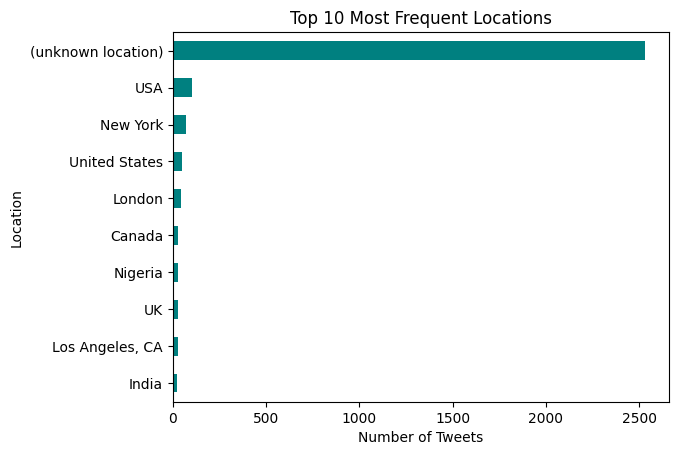

Rows missing 'location' value: 2533 row(s)
% of Rows missing 'location' value: 0.33
--------------------
location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64


In [6]:
### Explore location column distribution of Tweet text.
train_location_df = train_df['location'].fillna('(unknown location)')
top_locations = train_location_df.value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Most Frequent Locations")
plt.xlabel("Number of Tweets")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

missing_location_count = train_df['location'].isnull().sum()
print(f"Rows missing 'location' value: {missing_location_count} row(s)")
print(f"% of Rows missing 'location' value: {missing_location_count/len(train_df):.2f}")
print('--------------------')
print(train_df['location'].value_counts(normalize=False))


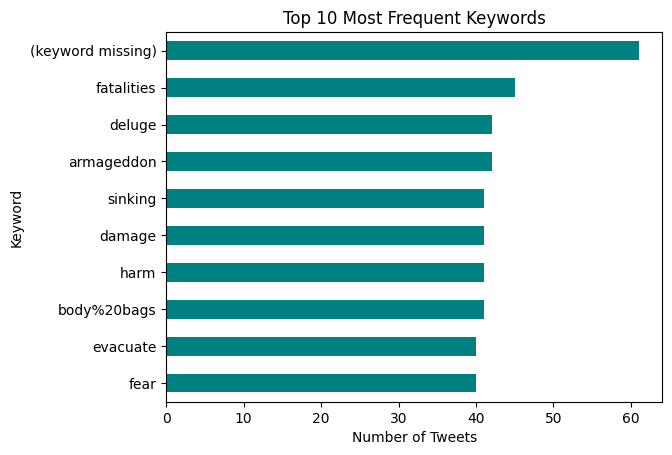

Rows missing 'keyword' value: 61 row(s)
% of Rows missing 'keyword' value: 0.01
--------------------
keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64


In [7]:
### Explore keyword column distribution of Tweet text.
train_keyword_missing_df = train_df['keyword'].fillna('(keyword missing)')
top_locations = train_keyword_missing_df.value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Most Frequent Keywords")
plt.xlabel("Number of Tweets")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.show()

missing_keyword_count = train_df['keyword'].isnull().sum()
print(f"Rows missing 'keyword' value: {missing_keyword_count} row(s)")
print(f"% of Rows missing 'keyword' value: {missing_keyword_count/len(train_df):.2f}")
print('--------------------')
print(train_df['keyword'].value_counts(normalize=False))


## II. Exploratory Data Analysis (EDA) ##
### II.ii. Data Analysis Summary ###
- The training dataset is slightly imbalanced (~57% of non-disaster tweets, ~43%) in the 'text' column.
- There is high missing rate in the 'location' column (33% of the column are empty.)
- On the contrary, only 1% of missing rate in the 'keyword' column.

### II.iii. Data Preparation ###
- It is recommended to apply the scikit-learn library on the 'text' column and use the compute_class_weight() method to modify the loss function. The computed weight metric allows the Keras library to adjust the weights during optimization.
- A high missing rate in the 'location' rate will introduce noise without bringing in much semantic value to the disaster text classification. Thus, the 'location' column should be ignored for this exercise.
- On the other hand, the 'keyword' column only has a 1% missing rate, and there are special keywords such as 'fatalities' and 'armageddon' in the dataset that can be used for disaster prediction.
- It is best to concatenate the 'keyword' column with the 'text' column to create a 'combined_text' column for the NLP processing instead of using a multi-input LSTM model with both 'keyword' and 'text' columns.
- Before concatenating the columns, missing values in the keyword column should be filled in with 'no_keyword' before NLP processing.
The training dataset is slightly imbalanced (~57% of non-disaster tweets, ~43%) in the 'text' column. It is recommended to apply the scikit-learn library, the compute_class_weight() method to modify the loss function, allowing the Keras library to adjust the weights during optimization.

Weight dictionary: {0: 0.8766697374481806, 1: 1.1637114032405993}


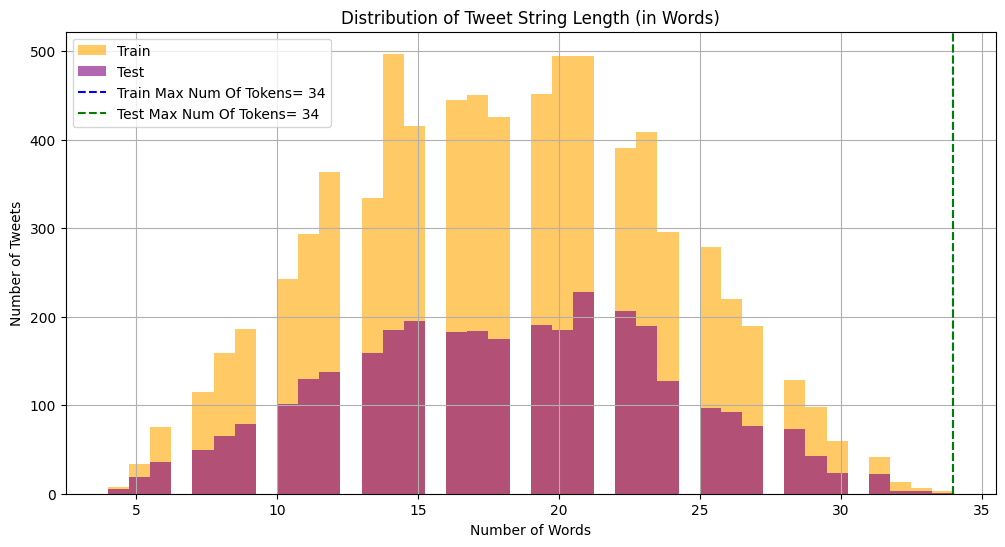

Data preparation complete.


In [8]:
# Data preparation before modeling
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

train_df['keyword'] =  train_df['keyword'].fillna('no_keyword')  
train_df['combined_text'] = '[KEYWORD] ' + train_df['keyword'] + ' [TEXT] ' + train_df['text']

test_df['keyword'] = test_df['keyword'].fillna('no_keyword')  
test_df['combined_text'] = '[KEYWORD] ' + test_df['keyword'] + ' [TEXT] ' + test_df['text']

# compute weight metrics
target_label = train_df['target'].values
unique_target = np.unique(target_label)  
weight = compute_class_weight(class_weight='balanced', classes=unique_target, y=target_label)
target_weight_dict = dict(zip(unique_target, weight))
print(f"Weight dictionary: {target_weight_dict}")

#show histogram of 'combined_text'
train_df['length_combined_text'] = train_df['combined_text'].apply(lambda x: len(str(x).split()))
test_df['length_combined_text'] = test_df['combined_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
plt.hist(train_df['length_combined_text'], bins=40, alpha=0.6, label='Train', color='orange')
plt.hist(test_df['length_combined_text'], bins=40, alpha=0.6, label='Test', color='purple')
plt.axvline(train_df['length_combined_text'].max(), color='blue', linestyle='--', label=f'Train Max Num Of Tokens= {train_df["length_combined_text"].max()}')
plt.axvline(test_df['length_combined_text'].max(), color='green', linestyle='--', label=f'Test Max Num Of Tokens= {test_df["length_combined_text"].max()}')
plt.title('Distribution of Tweet String Length (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.legend()
plt.grid(True)
plt.show()

print('Data preparation complete.')

## III. Model Architecture ##

### Model Description ###
- This model implements Natural Language Processing (NLP) using Recurrent Neural Network (RNN) based model with pre-trained Word2Vec embedding.

### NLP Word Embedding ###
- **Word2Vec** transforms words in the dataset into dense vector representations, capturing their semantic and contextual relationships.
- The resulting vectors correspond to words in the Word2Vec vocabulary, where the distance between two word vectors reflects their semantic or contextual similarity.
- The latent vector space learned by Word2Vec enables the model to infer relationships between words, even if certain words did not appear together in the training data.
- Since the total volume of the Tweeter text provided in this competition is less than 10,000 records (~7000), there is insufficient data to train any NLP engine to have meaningful contextual embeddings from scratch.
- To address this low resource probelm, I have to apply concept of transfer learning to use a pre-trained GloVe embedding from standford NLP project to fine-tune to this competition dataset: Ref:[https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)
- For more information with NLP processing, please refer to the course material in **CSCA-5842: Deep Learning for Natural Language Processing.**

### RNN Model Architecture ###
- According to the word token distribution above, both the development and test dataset has less than 35 tokens in the combined text, and with average 15-22 tokens for most of the combined Tweet text.
- This RNN model contains 3 layers:
  - A sequential layer with 64 units of LSTM to learn the vocabulary words
  - A dropout layer of dropout rate 50% to avoid overfittingingle layer with 64 units should be sufficient for text classiin the latent embeded space provide contextual similiarity
- Model begins with 32 filters, and then this hyperparameter value doubled of each subsequent layer: 32, 64, 128 
- Since each image size is 96 x 96 pixel of RGB channel, input shape = (96,96, 3)
- To avoid overfitting, each convolution block is matched with pooling layer and batch-normalization.
- First layer use 5x5 kernel to learn major feature and then 3x3 kernel following inspiration of VGG-16. 

#### Reference ###
- Ref: [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)
- Ref: [https://www.coursera.org/learn/deep-learning-natural-language-processing](https://www.coursera.org/learn/deep-learning-natural-language-processing)
- Ref: [https://www.coursera.org/learn/fundamentals-natural-language-processing](https://www.coursera.org/learn/fundamentals-natural-language-processing)
- Ref: [https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification](https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification)

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Multi-label-Text-Classification.jpg" width="600">

In [15]:
# loading Keras library
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

print('Keras library loaded.')

Keras library loaded.


In [ ]:
## Word2Vec LSTM Model class

class Word2VecLSTMClassifier:
    def __init__(self, 
                 embedding_params: dict,
                 sequence_model_params: dict):
        self.vocabulary_size = embedding_params['vocabulary_size']
        self.embedding_dimension = embedding_params['embedding_dimension']
        self.input_length = embedding_params['input_length']


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

class StaticContextTextClassifier:
    def __init__(self,
                 vocabuary_size,
                 embedding_dim,
                 embedding_matrix,
                 sequence_length=100,
                 lstm_units=64,
                 dense_units=32,
                 dropout_rnn=0.5,
                 dropout_dense=0.2,
                 use_gru=False,
                 trainable_embedding=False,
                 learning_rate=1e-3):
        """
        Initializes the classifier with configurable architecture.
        """
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.embedding_matrix = embedding_matrix
        self.sequence_length = sequence_length
        self.rnn_units = rnn_units
        self.dense_units = dense_units
        self.dropout_rnn = dropout_rnn
        self.dropout_dense = dropout_dense
        self.use_gru = use_gru
        self.trainable_embedding = trainable_embedding
        self.learning_rate = learning_rate

        self.model = self._build_model()

    def build_model(self):
        input_layer = Input(shape=(self.sequence_length,), name="text_input")

        embedding_layer = Embedding(input_dim=self.vocab_size,
                                    output_dim=self.embedding_dim,
                                    weights=[self.embedding_matrix],
                                    input_length=self.sequence_length,
                                    trainable=self.trainable_embedding)(input_layer)

        if self.use_gru:
            rnn_output = GRU(self.rnn_units)(embedding_layer)
        else:
            rnn_output = LSTM(self.rnn_units)(embedding_layer)

        rnn_output = Dropout(self.dropout_rnn)(rnn_output)
        dense_output = Dense(self.dense_units, activation='relu')(rnn_output)
        dense_output = Dropout(self.dropout_dense)(dense_output)
        final_output = Dense(1, activation='sigmoid')(dense_output)

        model = Model(inputs=input_layer, outputs=final_output)
        model.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=self.learning_rate),
                      metrics=['accuracy'])
        return model

    def get_model(self):
        return self.model


2025-07-19 23:49:55.369780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752968995.621506      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752968995.693509      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


3. Model Architecture (25 pts)

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. 

Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.  

There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.

Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.). 

In [10]:
print('3')

3


4. Results and Analysis (35 pts)

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

In [11]:
print('4')

4



Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?

In [12]:
print('5')

5
